In [ ]:
%pip install bettermdptools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 84.6 MB/s eta 0:00:00
  Created wheel for bettermdptools: filename=bettermdptools-0.8.0-py3-none-any.whl size=97616 sha256=715e0f7ceb91e43cc63588ad6037466ff548bbd33d4aed13dab80bc41149ddab
  Stored in directory: /root/.cache/pip/wheels/0b/2f/65/5c7bca02a2ba2298d4520bc6aab649f28a1db31f07645a165c
Successfully built bettermdptools
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling ma

In [ ]:
!pip install jax==0.4.13
!pip install jaxlib==0.4.13

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for jax: filename=jax-0.4.13-py3-none-any.whl size=1518818 sha256=adf6022ada352fb345030be2fb4bc6dfdf07119ce578f31af4b3b7dc709a9772
  Stored in directory: /root/.cache/pip/wheels/27/92/71/d84a9839f7b65be96d83697684a7e6d5d2db73cd9e4ce4e9a1
Successfully built jax
  Attempting uninstall: jax
    Found existing installation: jax 0.5.2
    Uninstalling jax-0.5.2:
      Successfully uninstalled jax-0.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.89 requires jax>=0.4.27, but you have jax 0.4.13 which is incompatible.
flax 0.10.5 requires jax>=0.5.1, but you have jax 0.4.13 which is incompatible.
optax 0.2.4 requires jax>=0.4.27,

In [ ]:
# !pip install bettermdptools


In [ ]:
import pandas as pd

In [ ]:
import gymnasium as gym

from bettermdptools.envs.blackjack_wrapper import BlackjackWrapper
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.planner import Planner
from bettermdptools.algorithms.rl import RL
from bettermdptools.utils.grid_search import GridSearch
from bettermdptools.utils.plots import Plots
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt



ERROR:jax._src.xla_bridge:Jax plugin configuration error: Plugin module %s could not be loaded
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/xla_bridge.py", line 420, in discover_pjrt_plugins
    plugin_module = importlib.import_module(plugin_module_name)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1147, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 690, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_r

In [ ]:
from bettermdptools.envs.cartpole_wrapper import CartpoleWrapper
from gymnasium.utils import seeding
import os
import random


In [ ]:
import time

In [ ]:
def set_seed(seed: int) -> None:
    """
    Set the seed for reproducibility.

    Parameters
    ----------
    seed : int
        The seed value to set.

    Returns
    -------
    None
    """
    global SEED
    SEED = seed
    os.environ["PYTHONHASHSEED"] = str(SEED)
    random.seed(SEED)
    np.random.seed(SEED)
    seeding.np_random(SEED)

In [ ]:
set_seed(30)

In [ ]:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re

def title_to_filename(title: str, extension: str = "png") -> str:
    """
    Converts a plot title into a safe filename.

    Parameters:
    - title (str): The title to convert
    - extension (str): The file extension to append (default is 'png')

    Returns:
    - str: A filename-safe string
    """
    safe = re.sub(r'[\\/*?:"<>|]', "", title)
    safe = safe.strip().replace(" ", "_")
    return f"{'/content/drive/MyDrive/Colab Notebooks/ML A4 Output/'}{safe}.{extension}"

In [ ]:
# Optional smoothing function
def moving_average(data, window_size=100):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')



In [ ]:
def max_q_value_change(q_track):
    q_deltas = [np.max(np.abs(q_track[i] - q_track[i-1])) for i in range(1, len(q_track))]
    return q_deltas

#Blackjack


In [ ]:
base_env = gym.make('Blackjack-v1', render_mode=None, natural=False) #no bonus given for natural blackjack.

blackjack = BlackjackWrapper(base_env)

# run VI
V, V_track, pi = Planner(blackjack.P).value_iteration()

#test policy
vi_test_scores = TestEnv.test_env(env=blackjack, n_iters=100, render=False, pi=pi, user_input=False)
print(np.mean(vi_test_scores))

# Q-learning
Q, V, pi, Q_track, pi_track, rewards = RL(blackjack).q_learning()

#test policy
q_learning_test_scores = TestEnv.test_env(env=blackjack, n_iters=100, render=False, pi=pi, user_input=False)
print(np.mean(q_learning_test_scores))

0.0


  0%|          | 0/10000 [00:00<?, ?it/s]

-0.09


In [ ]:
V_track_df=pd.DataFrame(V_track)
# V_track_df.head()
V_track_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,280,281,282,283,284,285,286,287,288,289
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.001181,-0.000873,-0.000556,-0.000205,0.000011,-0.001045,-0.001666,-0.002374,-0.003263,-0.004459,...,0.011000,0.011000,0.011000,0.011000,0.011000,0.011000,0.011000,0.011000,0.010154,0.007615
std,0.011777,0.008750,0.005719,0.002819,0.002462,0.010919,0.016640,0.023672,0.032787,0.045216,...,0.104355,0.104355,0.104355,0.104355,0.104355,0.104355,0.104355,0.104355,0.096327,0.072247
min,-0.135131,-0.116423,-0.097414,-0.077166,-0.070938,-0.195266,-0.195266,-0.250281,-0.343875,-0.482899,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.000000,0.000000,0.000000,0.000000,0.011130,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.923077,0.692308


In [ ]:
print(vi_test_scores)

[ 0.  1. -1. -1.  1. -1.  1.  1. -1.  0. -1. -1. -1.  1. -1. -1. -1. -1.
  1. -1. -1.  1.  1. -1.  1. -1.  0.  1. -1. -1.  1.  1.  1.  1. -1. -1.
  1. -1.  1. -1.  0.  0.  0. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  0.
  1. -1.  1. -1.  1.  1. -1. -1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1.
 -1.  1.  1. -1. -1.  1.  1. -1.  1.  1. -1. -1.  0. -1. -1. -1.  1.  1.
  1.  0. -1.  1. -1.  0. -1.  1.  1. -1.]


In [ ]:
print(pi)

{0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 0, 13: 0, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 0, 24: 1, 25: 1, 26: 0, 27: 1, 28: 1, 29: 1, 30: 1, 31: 0, 32: 1, 33: 1, 34: 0, 35: 1, 36: 0, 37: 0, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 0, 44: 1, 45: 1, 46: 0, 47: 0, 48: 1, 49: 0, 50: 1, 51: 0, 52: 0, 53: 0, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 0, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 0, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 0, 83: 0, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 0, 91: 0, 92: 1, 93: 1, 94: 0, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 0, 103: 0, 104: 0, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 1, 116: 0, 117: 0, 118: 1, 119: 0, 120: 1, 121: 0, 122: 0, 123: 0, 124: 1, 125: 1, 126: 0, 127: 1, 128: 1, 129: 1, 130: 0, 131: 0, 132: 0, 133: 1, 134: 0, 135: 0, 136: 0, 137: 0, 138: 

In [ ]:
gamma=[.25, .5, .9, 1]
n_iters=[100,500,1000, 5000,10000]
theta=[ .00001,0.000001]

vi_rewards_and_params_results, vi_highest_avg_reward, vi_best_params = GridSearch.vi_grid_search(blackjack, gamma, n_iters, theta)

running VI with gamma: 0.25  n_iters: 100  theta: 1e-05
Avg. episode reward:  -0.13
###################
running VI with gamma: 0.25  n_iters: 100  theta: 1e-06
Avg. episode reward:  -0.21
###################
running VI with gamma: 0.25  n_iters: 500  theta: 1e-05
Avg. episode reward:  -0.02
###################
running VI with gamma: 0.25  n_iters: 500  theta: 1e-06
Avg. episode reward:  -0.1
###################
running VI with gamma: 0.25  n_iters: 1000  theta: 1e-05
Avg. episode reward:  0.16
###################
running VI with gamma: 0.25  n_iters: 1000  theta: 1e-06
Avg. episode reward:  0.03
###################
running VI with gamma: 0.25  n_iters: 5000  theta: 1e-05
Avg. episode reward:  0.03
###################
running VI with gamma: 0.25  n_iters: 5000  theta: 1e-06
Avg. episode reward:  0.01
###################
running VI with gamma: 0.25  n_iters: 10000  theta: 1e-05
Avg. episode reward:  -0.14
###################
running VI with gamma: 0.25  n_iters: 10000  theta: 1e-06
Avg. 

In [ ]:
print(vi_best_params)

(0.25, 1000, 1e-05)


In [ ]:
gamma=[.25, .5, .9, 1]
n_iters=[100,500,1000, 5000,10000, 100000]
theta=[.00001, 0.000001, 1e-010]

pi_rewards_and_params_results, pi_highest_avg_reward, pi_best_params = GridSearch.pi_grid_search(blackjack, gamma, n_iters, theta)

running PI with gamma: 0.25  n_iters: 100  theta: 1e-05
Avg. episode reward:  0.1
###################
running PI with gamma: 0.25  n_iters: 100  theta: 1e-06
Avg. episode reward:  0.03
###################
running PI with gamma: 0.25  n_iters: 100  theta: 1e-10
Avg. episode reward:  -0.12
###################
running PI with gamma: 0.25  n_iters: 500  theta: 1e-05
Avg. episode reward:  -0.12
###################
running PI with gamma: 0.25  n_iters: 500  theta: 1e-06
Avg. episode reward:  -0.01
###################
running PI with gamma: 0.25  n_iters: 500  theta: 1e-10
Avg. episode reward:  0.0
###################
running PI with gamma: 0.25  n_iters: 1000  theta: 1e-05
Avg. episode reward:  -0.14
###################
running PI with gamma: 0.25  n_iters: 1000  theta: 1e-06
Avg. episode reward:  0.04
###################
running PI with gamma: 0.25  n_iters: 1000  theta: 1e-10
Avg. episode reward:  0.08
###################
running PI with gamma: 0.25  n_iters: 5000  theta: 1e-05
Avg. episod

In [ ]:
print(pi_best_params)
print(pi_highest_avg_reward)

(0.25, 5000, 1e-10)
0.25


In [ ]:
print(pi_rewards_and_params_results)

[{'avg_reward': 0.1, 'params': (0.25, 100, 1e-05)}, {'avg_reward': 0.03, 'params': (0.25, 100, 1e-06)}, {'avg_reward': -0.12, 'params': (0.25, 100, 1e-10)}, {'avg_reward': -0.12, 'params': (0.25, 500, 1e-05)}, {'avg_reward': -0.01, 'params': (0.25, 500, 1e-06)}, {'avg_reward': 0.0, 'params': (0.25, 500, 1e-10)}, {'avg_reward': -0.14, 'params': (0.25, 1000, 1e-05)}, {'avg_reward': 0.04, 'params': (0.25, 1000, 1e-06)}, {'avg_reward': 0.08, 'params': (0.25, 1000, 1e-10)}, {'avg_reward': -0.1, 'params': (0.25, 5000, 1e-05)}, {'avg_reward': -0.26, 'params': (0.25, 5000, 1e-06)}, {'avg_reward': 0.25, 'params': (0.25, 5000, 1e-10)}, {'avg_reward': 0.07, 'params': (0.25, 10000, 1e-05)}, {'avg_reward': -0.04, 'params': (0.25, 10000, 1e-06)}, {'avg_reward': -0.14, 'params': (0.25, 10000, 1e-10)}, {'avg_reward': -0.12, 'params': (0.25, 100000, 1e-05)}, {'avg_reward': -0.04, 'params': (0.25, 100000, 1e-06)}, {'avg_reward': -0.03, 'params': (0.25, 100000, 1e-10)}, {'avg_reward': -0.11, 'params': (0

##PI

In [ ]:
policy_iter_V, policy_iter_V_track, policy_iter_pi = Planner(blackjack.P).policy_iteration(gamma=0.9, n_iters= 1000, theta=0.1e-06)


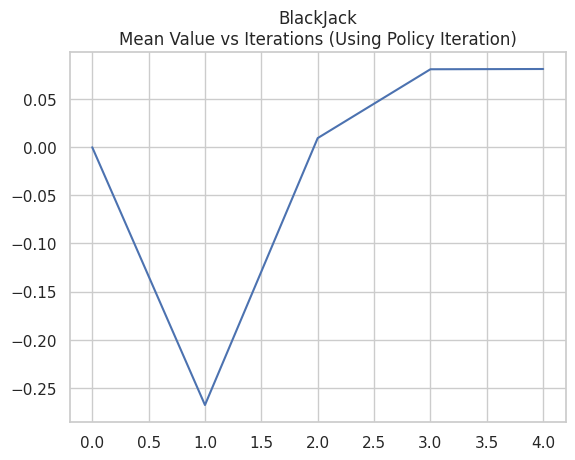

In [ ]:
blackjack_policy_max_value_per_iter = np.trim_zeros(np.mean(policy_iter_V_track, axis=1), 'b')
Plots.v_iters_plot(blackjack_policy_max_value_per_iter, "BlackJack\nMean Value vs Iterations (Using Policy Iteration)")


## Try and get state values vs iterations


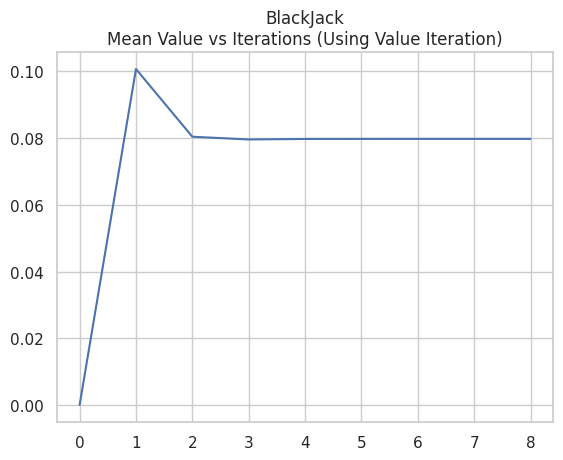

In [ ]:
V_1, V_track_1, pi_1 = Planner(blackjack.P).value_iteration(gamma=1,n_iters=500,theta=0.00001) ##using best parameters from grid search

max_value_per_iter = np.trim_zeros(np.mean(V_track_1, axis=1), 'b')
Plots.v_iters_plot(max_value_per_iter, "BlackJack\nMean Value vs Iterations (Using Value Iteration)")



In [ ]:
# V_g_75, V_track_g_75, pi_g_75 = Planner(blackjack.P).value_iteration(gamma=0.75,n_iters=1000,theta=0.00001) ##using best parameters from grid search

# max_value_per_iter = np.trim_zeros(np.mean(V_track_g_75, axis=1), 'b')
# Plots.v_iters_plot(max_value_per_iter, "BlackJack\nMean Value v Iterations")

In [ ]:
# V_g_25, V_track_g_25, pi_g_25 = Planner(blackjack.P).value_iteration(gamma=0.25,n_iters=1000,theta=0.00001) ##using best parameters from grid search

# max_value_per_iter = np.trim_zeros(np.mean(V_track_g_25, axis=1), 'b')
# Plots.v_iters_plot(max_value_per_iter, "BlackJack\nMean Value v Iterations")

## Policy Map

In [ ]:
#create actions dictionary and set map size
blackjack_actions = {0: "S", 1: "H"}
blackjack_map_size=(29, 10)

#get formatted state values and policy map
## Policy and map for when gamma was set to 1
val_max, policy_map = Plots.get_policy_map(pi_1, V_1, blackjack_actions, blackjack_map_size)

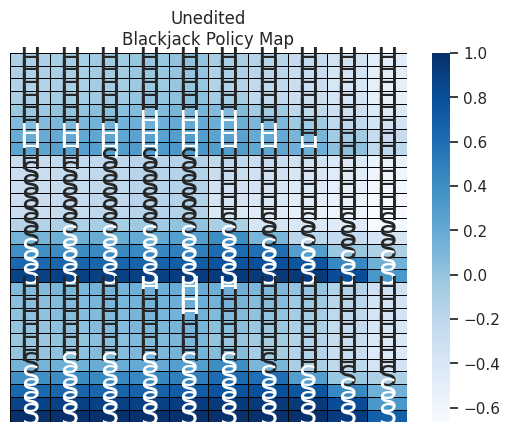

In [ ]:
#plot policy map
title="Unedited\nBlackjack Policy Map"
Plots.plot_policy(val_max, policy_map, blackjack_map_size, title)

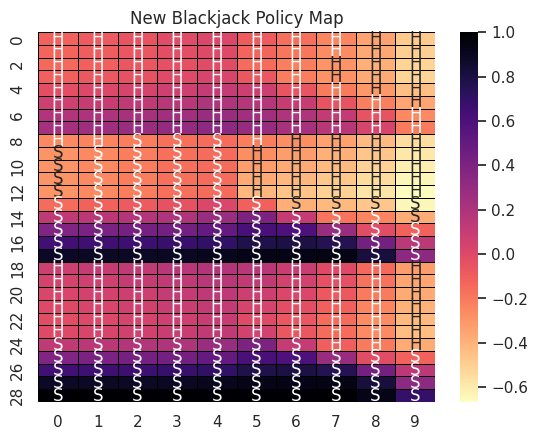

In [ ]:
from bettermdptools.utils.decorators import add_to

@add_to(Plots)
@staticmethod
def modified_plot_policy(val_max, directions, map_size, title):
    """Plot the policy learned."""
    sns.heatmap(
        val_max,
        annot=directions,
        fmt="",
        cmap=sns.color_palette("magma_r", as_cmap=True),
        linewidths=0.7,
        linecolor="black",
    ).set(title=title)
    img_title = f"Policy_{map_size[0]}x{map_size[1]}.png"
    plt.show()

title = "New Blackjack Policy Map"
Plots.modified_plot_policy(val_max, policy_map, blackjack_map_size, title)

### What does the color mean?

In [ ]:
policy_iter_val_max, policy_iter_policy_map = Plots.get_policy_map(policy_iter_pi, policy_iter_V, blackjack_actions, blackjack_map_size)


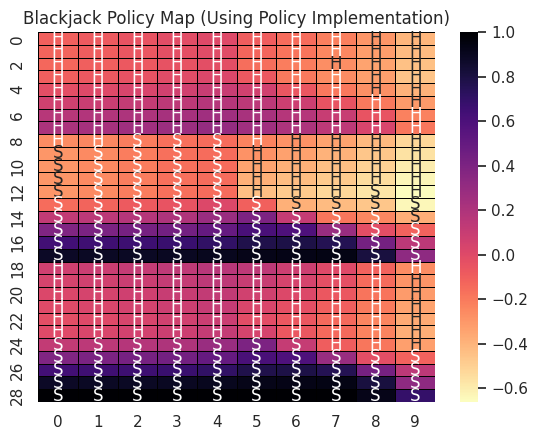

In [ ]:
title = "Blackjack Policy Map (Using Policy Implementation)"
Plots.modified_plot_policy(policy_iter_val_max, policy_iter_policy_map, blackjack_map_size, title)

##Blackjack Q-learning

In [ ]:
from bettermdptools.utils.grid_search import GridSearch


In [ ]:
test_gamma = [0.25, 0.5, 0.75, 0.99]
test_epsilon_decay = [0.25, 0.5,0.9]
test_iters = [10000, 15000]
q_bj_rewards_and_params_results, q_bj_highest_avg_reward, q_bj_best_params = \
  GridSearch.q_learning_grid_search(blackjack, test_gamma, test_epsilon_decay, test_iters)


running q_learning with gamma: 0.25 epsilon decay: 0.25  iterations: 10000


  0%|          | 0/10000 [00:00<?, ?it/s]

Avg. episode reward:  -0.04
###################
running q_learning with gamma: 0.25 epsilon decay: 0.25  iterations: 15000


  0%|          | 0/15000 [00:00<?, ?it/s]

Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.25 epsilon decay: 0.5  iterations: 10000


  0%|          | 0/10000 [00:00<?, ?it/s]

Avg. episode reward:  -0.01
###################
running q_learning with gamma: 0.25 epsilon decay: 0.5  iterations: 15000


  0%|          | 0/15000 [00:00<?, ?it/s]

Avg. episode reward:  -0.12
###################
running q_learning with gamma: 0.25 epsilon decay: 0.9  iterations: 10000


  0%|          | 0/10000 [00:00<?, ?it/s]

Avg. episode reward:  -0.02
###################
running q_learning with gamma: 0.25 epsilon decay: 0.9  iterations: 15000


  0%|          | 0/15000 [00:00<?, ?it/s]

Avg. episode reward:  0.02
###################
running q_learning with gamma: 0.5 epsilon decay: 0.25  iterations: 10000


  0%|          | 0/10000 [00:00<?, ?it/s]

Avg. episode reward:  0.04
###################
running q_learning with gamma: 0.5 epsilon decay: 0.25  iterations: 15000


  0%|          | 0/15000 [00:00<?, ?it/s]

Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.5 epsilon decay: 0.5  iterations: 10000


  0%|          | 0/10000 [00:00<?, ?it/s]

Avg. episode reward:  -0.01
###################
running q_learning with gamma: 0.5 epsilon decay: 0.5  iterations: 15000


  0%|          | 0/15000 [00:00<?, ?it/s]

Avg. episode reward:  -0.01
###################
running q_learning with gamma: 0.5 epsilon decay: 0.9  iterations: 10000


  0%|          | 0/10000 [00:00<?, ?it/s]

Avg. episode reward:  -0.15
###################
running q_learning with gamma: 0.5 epsilon decay: 0.9  iterations: 15000


  0%|          | 0/15000 [00:00<?, ?it/s]

Avg. episode reward:  -0.08
###################
running q_learning with gamma: 0.75 epsilon decay: 0.25  iterations: 10000


  0%|          | 0/10000 [00:00<?, ?it/s]

Avg. episode reward:  0.02
###################
running q_learning with gamma: 0.75 epsilon decay: 0.25  iterations: 15000


  0%|          | 0/15000 [00:00<?, ?it/s]

Avg. episode reward:  0.1
###################
running q_learning with gamma: 0.75 epsilon decay: 0.5  iterations: 10000


  0%|          | 0/10000 [00:00<?, ?it/s]

Avg. episode reward:  -0.08
###################
running q_learning with gamma: 0.75 epsilon decay: 0.5  iterations: 15000


  0%|          | 0/15000 [00:00<?, ?it/s]

Avg. episode reward:  -0.18
###################
running q_learning with gamma: 0.75 epsilon decay: 0.9  iterations: 10000


  0%|          | 0/10000 [00:00<?, ?it/s]

Avg. episode reward:  -0.24
###################
running q_learning with gamma: 0.75 epsilon decay: 0.9  iterations: 15000


  0%|          | 0/15000 [00:00<?, ?it/s]

Avg. episode reward:  -0.02
###################
running q_learning with gamma: 0.99 epsilon decay: 0.25  iterations: 10000


  0%|          | 0/10000 [00:00<?, ?it/s]

Avg. episode reward:  -0.16
###################
running q_learning with gamma: 0.99 epsilon decay: 0.25  iterations: 15000


  0%|          | 0/15000 [00:00<?, ?it/s]

Avg. episode reward:  -0.19
###################
running q_learning with gamma: 0.99 epsilon decay: 0.5  iterations: 10000


  0%|          | 0/10000 [00:00<?, ?it/s]

Avg. episode reward:  -0.12
###################
running q_learning with gamma: 0.99 epsilon decay: 0.5  iterations: 15000


  0%|          | 0/15000 [00:00<?, ?it/s]

Avg. episode reward:  -0.17
###################
running q_learning with gamma: 0.99 epsilon decay: 0.9  iterations: 10000


  0%|          | 0/10000 [00:00<?, ?it/s]

Avg. episode reward:  -0.1
###################
running q_learning with gamma: 0.99 epsilon decay: 0.9  iterations: 15000


  0%|          | 0/15000 [00:00<?, ?it/s]

Avg. episode reward:  0.01
###################


In [ ]:
print(q_bj_best_params)
print(q_bj_highest_avg_reward)

(0.75, 0.25, 15000)
0.1


In [ ]:

start_time_gamma99 = time.time()
Q_bj_gamma_99, V_bj_gamma_99, pi_bj_gamma_99, Q_track_bj_gamma_99, pi_track_bj_gamma_99, rewards_bj_gamma_99 \
 = RL(blackjack).q_learning( nS=None, \
        nA=None,
        gamma=0.99,
        init_alpha=0.5,
        min_alpha=0.01,
        alpha_decay_ratio=0.5,
        init_epsilon=1.0,
        min_epsilon=0.1,
        epsilon_decay_ratio=0.9,
        n_episodes=15000)

end_time_gamma99 = time.time()

time_to_run_gamma99_qlearning = (end_time_gamma99 - start_time_gamma99)/60 ## in minutes


  0%|          | 0/15000 [00:00<?, ?it/s]

In [ ]:
# Optional smoothing function
def moving_average(data, window_size=100):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')



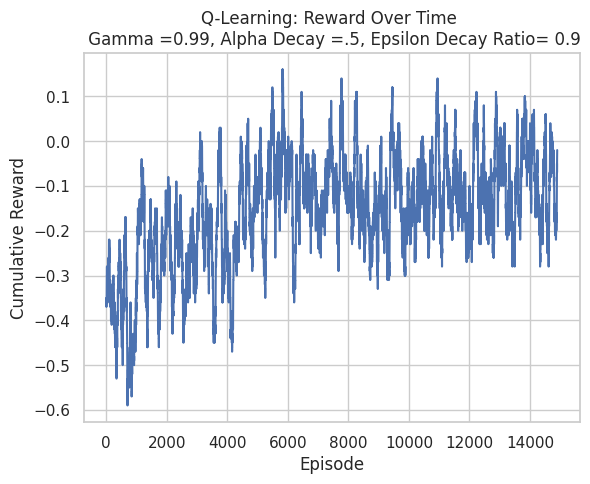

In [ ]:
plt.figure()
plt.plot(moving_average(rewards_bj_gamma_99), label='Smoothed Rewards')
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Q-Learning: Reward Over Time \n Gamma =0.99, Alpha Decay =.5, Epsilon Decay Ratio= 0.9")
plt.grid(True)
# plt.legend()
plt.show()

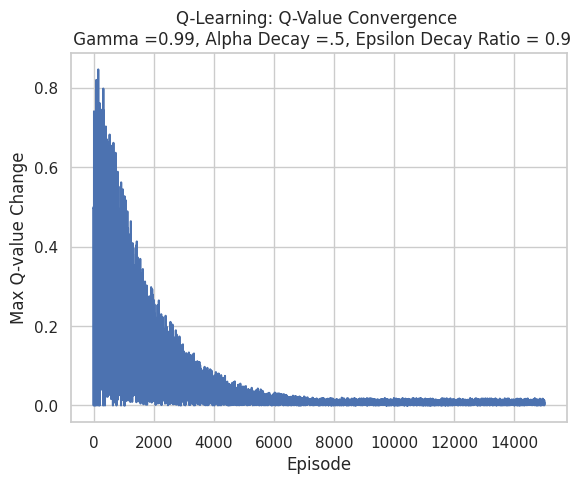

In [ ]:
q_deltas_gamma_99 = [np.max(np.abs(Q_track_bj_gamma_99[i] - Q_track_bj_gamma_99[i-1])) for i in range(1, len(Q_track_bj_gamma_99))]

plt.figure()
plt.plot(q_deltas_gamma_99)
plt.xlabel("Episode")
plt.ylabel("Max Q-value Change")
plt.title("Q-Learning: Q-Value Convergence \n Gamma =0.99, Alpha Decay =.5, Epsilon Decay Ratio = 0.9")
plt.grid(True)
plt.show()

###Q Learning, Gamma 0.25


In [ ]:
start_time_gamma25_episode5000 = time.time()
Q_bj_gamma_25, V_bj_gamma_25, pi_bj_gamma_25, Q_track_bj_gamma_25, pi_track_bj_gamma_25, rewards_bj_gamma_25 \
 = RL(blackjack).q_learning( nS=None, \
        nA=None,
        gamma=0.25,
        init_alpha=0.5,
        min_alpha=0.01,
        alpha_decay_ratio=0.5,
        init_epsilon=1.0,
        min_epsilon=0.1,
        epsilon_decay_ratio=0.9,
        n_episodes=15000)

end_time_gamma25_episode5000 = time.time()



  0%|          | 0/15000 [00:00<?, ?it/s]

In [ ]:
time_to_run_gamma25_qlearning = (end_time_gamma25_episode5000 - start_time_gamma25_episode5000)/60 ## in minutes

In [ ]:
print(time_to_run_gamma25_qlearning)

0.050578018029530845


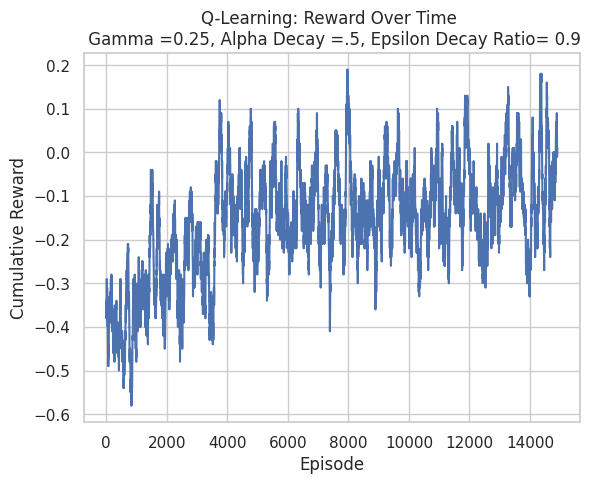

In [ ]:
plt.figure()
plt.plot(moving_average(rewards_bj_gamma_25), label='100 Episode Moving Average')
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Q-Learning: Reward Over Time \n Gamma =0.25, Alpha Decay =.5, Epsilon Decay Ratio= 0.9")
plt.grid(True)
# plt.legend()
plt.show()

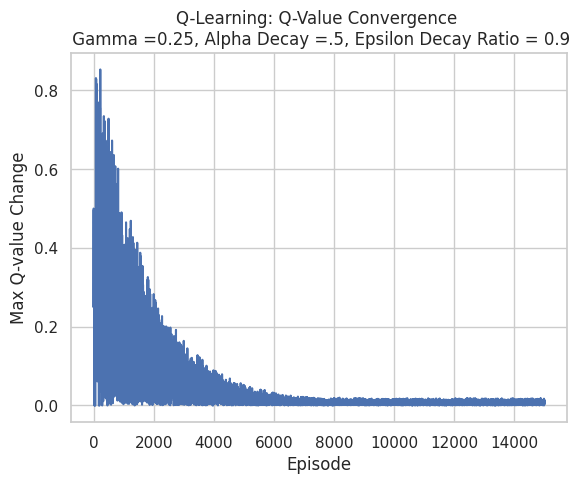

In [ ]:
q_deltas_gamma_25 = [np.max(np.abs(Q_track_bj_gamma_25[i] - Q_track_bj_gamma_25[i-1])) for i in range(1, len(Q_track_bj_gamma_25))]

plt.figure()
plt.plot(q_deltas_gamma_25)
plt.xlabel("Episode")
plt.ylabel("Max Q-value Change")
plt.title("Q-Learning: Q-Value Convergence \n Gamma =0.25, Alpha Decay =.5, Epsilon Decay Ratio = 0.9")
plt.grid(True)
plt.show()

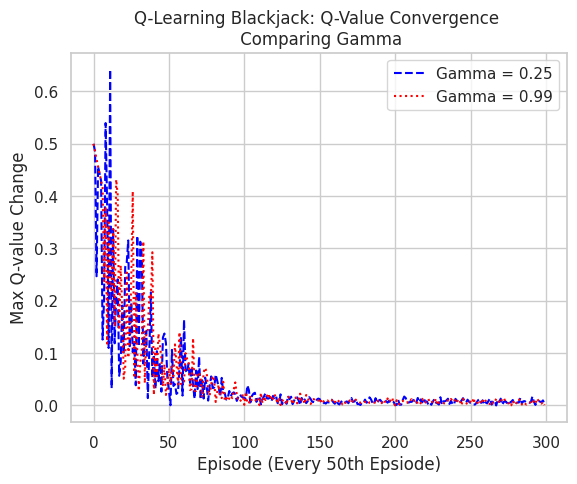

In [ ]:
step = 50  # Plot every 50th point
title = "Q-Learning Blackjack: Q-Value Convergence \n Comparing Gamma"
plt.figure()
plt.plot(q_deltas_gamma_25[::step], label = 'Gamma = 0.25', linestyle='--', color='blue')
plt.plot(q_deltas_gamma_99[::step], label = 'Gamma = 0.99', linestyle=':', color='red')
plt.legend()
plt.xlabel("Episode (Every 50th Epsiode)")
plt.ylabel("Max Q-value Change")
plt.title(title)

plt.savefig(title_to_filename(title))
plt.grid(True)
plt.show()

###Q Learning Optimized


In [ ]:
start_time_gamma75 = time.time()
Q_bj_gamma_75, V_bj_gamma_75, pi_bj_gamma_75, Q_track_bj_gamma_75, pi_track_bj_gamma_75, rewards_bj_gamma_75 \
 = RL(blackjack).q_learning( nS=None, \
        nA=None,
        gamma=0.75,
        init_alpha=0.5,
        min_alpha=0.01,
        alpha_decay_ratio=0.5,
        init_epsilon=1.0,
        min_epsilon=0.1,
        epsilon_decay_ratio=0.25,
        n_episodes=15000)

end_time_gamma75 = time.time()

time_to_run_gamma75_qlearning = (end_time_gamma75 - start_time_gamma75)/60 ## in minute

  0%|          | 0/15000 [00:00<?, ?it/s]

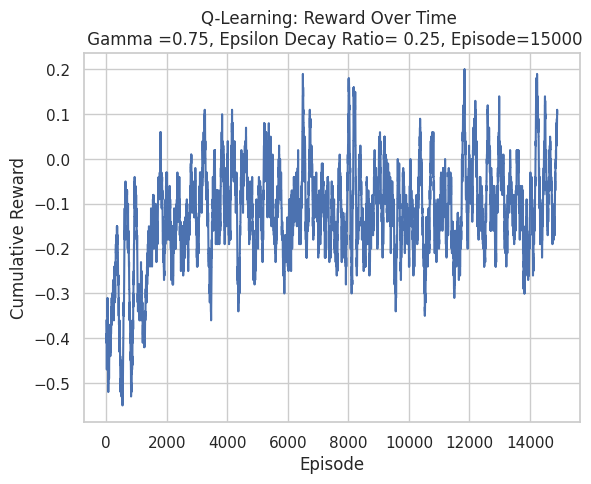

In [ ]:
plt.figure()
plt.plot(moving_average(rewards_bj_gamma_75), label='100 Episode Moving Average')
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Q-Learning: Reward Over Time \n Gamma =0.75, Epsilon Decay Ratio= 0.25, Episode=15000")
plt.grid(True)
# plt.legend()
plt.show()

In [ ]:
def max_q_value_change(q_track):
    q_deltas = [np.max(np.abs(q_track[i] - q_track[i-1])) for i in range(1, len(q_track))]
    return q_deltas

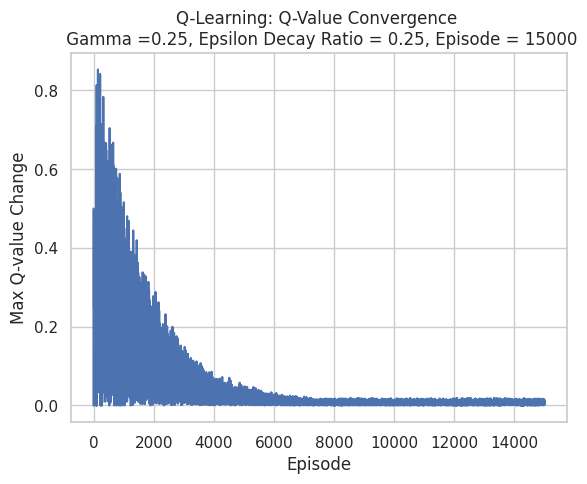

In [ ]:
q_deltas_gamma_75 = max_q_value_change(Q_track_bj_gamma_75)

plt.figure()
plt.plot(q_deltas_gamma_75)
plt.xlabel("Episode")
plt.ylabel("Max Q-value Change")
plt.title("Q-Learning: Q-Value Convergence \n Gamma =0.25, Epsilon Decay Ratio = 0.25, Episode = 15000")
plt.grid(True)
plt.show()

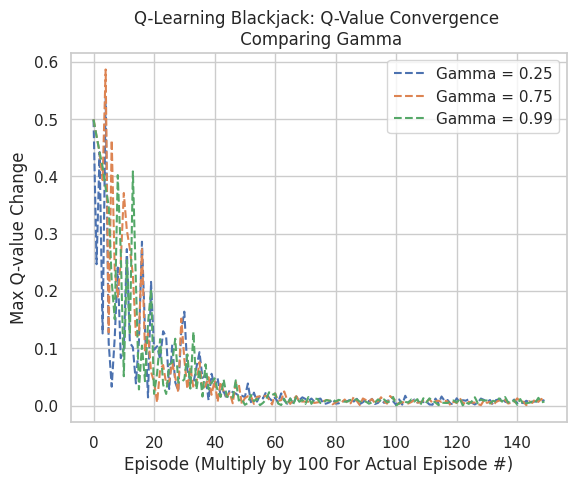

In [ ]:
step = 100  # Plot every 50th point

title = "Q-Learning Blackjack: Q-Value Convergence \n Comparing Gamma"
plt.figure()
plt.plot(q_deltas_gamma_25[::step], label = 'Gamma = 0.25',linestyle='--')  #, linestyle='--', color='blue')
plt.plot(q_deltas_gamma_75[::step], label = 'Gamma = 0.75',linestyle='--')#  , linestyle='-', color='orange')
plt.plot(q_deltas_gamma_99[::step], label = 'Gamma = 0.99',linestyle='--')#  , linestyle=':', color='red')
plt.legend()
plt.xlabel("Episode (Multiply by 100 For Actual Episode #)")
plt.ylabel("Max Q-value Change")
plt.title(title)
plt.grid(True)
plt.savefig(title_to_filename(title))
plt.show()


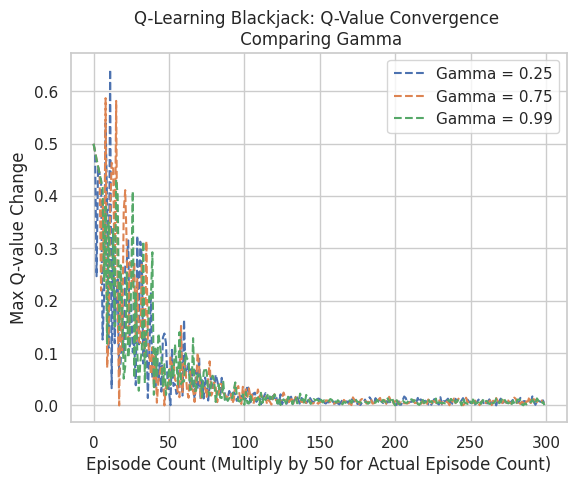

In [ ]:
step = 50  # Plot every 50th point

plt.figure()
title = "Q-Learning Blackjack: Q-Value Convergence \n Comparing Gamma"
plt.plot(q_deltas_gamma_25[::step], label = 'Gamma = 0.25',linestyle='--')#, linestyle='--', color='blue')
plt.plot(q_deltas_gamma_75[::step], label = 'Gamma = 0.75',linestyle='--')#, linestyle='-', color='green')
plt.plot(q_deltas_gamma_99[::step], label = 'Gamma = 0.99',linestyle='--')#, linestyle=':', color='red')
plt.legend()
plt.xlabel("Episode Count (Multiply by 50 for Actual Episode Count)")
plt.ylabel("Max Q-value Change")
plt.title(title)
plt.grid(True)
plt.savefig(title_to_filename(title))
plt.show()


###Q Learning Policy Map

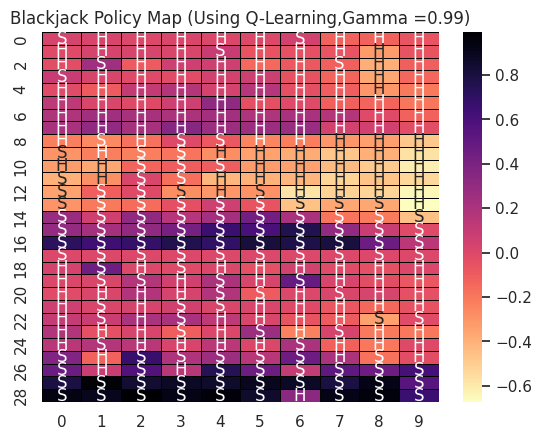

In [ ]:
q_learning_val_max, q_learning_policy_map = Plots.get_policy_map(pi_bj_gamma_99, V_bj_gamma_99, blackjack_actions, blackjack_map_size)

# val_max, policy_map = Plots.get_policy_map(pi_1, V_1, blackjack_actions, blackjack_map_size)
# Q_bj_gamma_99, V_bj_gamma_99, pi_bj_gamma_99, Q_track_bj_gamma_99, pi_track_bj_gamma_99, rewards_bj_gamma_99

title = "Blackjack Policy Map (Using Q-Learning,Gamma =0.99)"
Plots.modified_plot_policy(q_learning_val_max, q_learning_policy_map, blackjack_map_size, title)

##Blackjack SARSA


In [ ]:
test_gamma = [0.25, 0.5, 0.75, 0.99]
test_epsilon_decay = [0.25, 0.5,0.9]
test_iters = [10000, 15000]
sarsa_bj_rewards_and_params_results, sarsa_bj_highest_avg_reward, sarsa_bj_best_params = \
  GridSearch.sarsa_grid_search(blackjack, test_gamma, test_epsilon_decay, test_iters)

running sarsa with gamma: 0.25 epsilon decay: 0.25  iterations: 10000


  0%|          | 0/10000 [00:00<?, ?it/s]

Avg. episode reward:  -0.23
###################
running sarsa with gamma: 0.25 epsilon decay: 0.25  iterations: 15000


  0%|          | 0/15000 [00:00<?, ?it/s]

Avg. episode reward:  -0.04
###################
running sarsa with gamma: 0.25 epsilon decay: 0.5  iterations: 10000


  0%|          | 0/10000 [00:00<?, ?it/s]

Avg. episode reward:  -0.11
###################
running sarsa with gamma: 0.25 epsilon decay: 0.5  iterations: 15000


  0%|          | 0/15000 [00:00<?, ?it/s]

Avg. episode reward:  -0.02
###################
running sarsa with gamma: 0.25 epsilon decay: 0.9  iterations: 10000


  0%|          | 0/10000 [00:00<?, ?it/s]

Avg. episode reward:  -0.04
###################
running sarsa with gamma: 0.25 epsilon decay: 0.9  iterations: 15000


  0%|          | 0/15000 [00:00<?, ?it/s]

Avg. episode reward:  -0.11
###################
running sarsa with gamma: 0.5 epsilon decay: 0.25  iterations: 10000


  0%|          | 0/10000 [00:00<?, ?it/s]

Avg. episode reward:  -0.08
###################
running sarsa with gamma: 0.5 epsilon decay: 0.25  iterations: 15000


  0%|          | 0/15000 [00:00<?, ?it/s]

Avg. episode reward:  0.05
###################
running sarsa with gamma: 0.5 epsilon decay: 0.5  iterations: 10000


  0%|          | 0/10000 [00:00<?, ?it/s]

Avg. episode reward:  -0.1
###################
running sarsa with gamma: 0.5 epsilon decay: 0.5  iterations: 15000


  0%|          | 0/15000 [00:00<?, ?it/s]

Avg. episode reward:  -0.12
###################
running sarsa with gamma: 0.5 epsilon decay: 0.9  iterations: 10000


  0%|          | 0/10000 [00:00<?, ?it/s]

Avg. episode reward:  -0.05
###################
running sarsa with gamma: 0.5 epsilon decay: 0.9  iterations: 15000


  0%|          | 0/15000 [00:00<?, ?it/s]

Avg. episode reward:  -0.17
###################
running sarsa with gamma: 0.75 epsilon decay: 0.25  iterations: 10000


  0%|          | 0/10000 [00:00<?, ?it/s]

Avg. episode reward:  -0.2
###################
running sarsa with gamma: 0.75 epsilon decay: 0.25  iterations: 15000


  0%|          | 0/15000 [00:00<?, ?it/s]

Avg. episode reward:  -0.1
###################
running sarsa with gamma: 0.75 epsilon decay: 0.5  iterations: 10000


  0%|          | 0/10000 [00:00<?, ?it/s]

Avg. episode reward:  -0.06
###################
running sarsa with gamma: 0.75 epsilon decay: 0.5  iterations: 15000


  0%|          | 0/15000 [00:00<?, ?it/s]

Avg. episode reward:  -0.03
###################
running sarsa with gamma: 0.75 epsilon decay: 0.9  iterations: 10000


  0%|          | 0/10000 [00:00<?, ?it/s]

Avg. episode reward:  -0.06
###################
running sarsa with gamma: 0.75 epsilon decay: 0.9  iterations: 15000


  0%|          | 0/15000 [00:00<?, ?it/s]

Avg. episode reward:  -0.19
###################
running sarsa with gamma: 0.99 epsilon decay: 0.25  iterations: 10000


  0%|          | 0/10000 [00:00<?, ?it/s]

Avg. episode reward:  -0.05
###################
running sarsa with gamma: 0.99 epsilon decay: 0.25  iterations: 15000


  0%|          | 0/15000 [00:00<?, ?it/s]

Avg. episode reward:  -0.01
###################
running sarsa with gamma: 0.99 epsilon decay: 0.5  iterations: 10000


  0%|          | 0/10000 [00:00<?, ?it/s]

Avg. episode reward:  -0.06
###################
running sarsa with gamma: 0.99 epsilon decay: 0.5  iterations: 15000


  0%|          | 0/15000 [00:00<?, ?it/s]

Avg. episode reward:  -0.04
###################
running sarsa with gamma: 0.99 epsilon decay: 0.9  iterations: 10000


  0%|          | 0/10000 [00:00<?, ?it/s]

Avg. episode reward:  -0.05
###################
running sarsa with gamma: 0.99 epsilon decay: 0.9  iterations: 15000


  0%|          | 0/15000 [00:00<?, ?it/s]

Avg. episode reward:  -0.15
###################


In [ ]:
print(sarsa_bj_best_params)
print(sarsa_bj_highest_avg_reward)

(0.5, 0.25, 15000)
0.05


In [ ]:
start_time_sarsa_default_settings = time.time()
Q_bj_sarsa_g_99, V_bj_sarsa_g_99, pi_bj_sarsa_g_99, Q_track_bj_sarsa_g_99, pi_track_bj_sarsa_g_99, rewards_bj_sarsa_g_99 \
= RL(blackjack).sarsa( nS=None, \
	nA=None,
	gamma=0.99,
	init_alpha=0.5,
	min_alpha=0.01,
	alpha_decay_ratio=0.5,
	init_epsilon=1.0,
	min_epsilon=0.1,
	epsilon_decay_ratio=0.9,
	n_episodes=10000
)

end_time_sarsa_default_settings = time.time()

time_to_run_default_sarsa = (end_time_sarsa_default_settings - start_time_sarsa_default_settings)/60 ## in minut

  0%|          | 0/10000 [00:00<?, ?it/s]

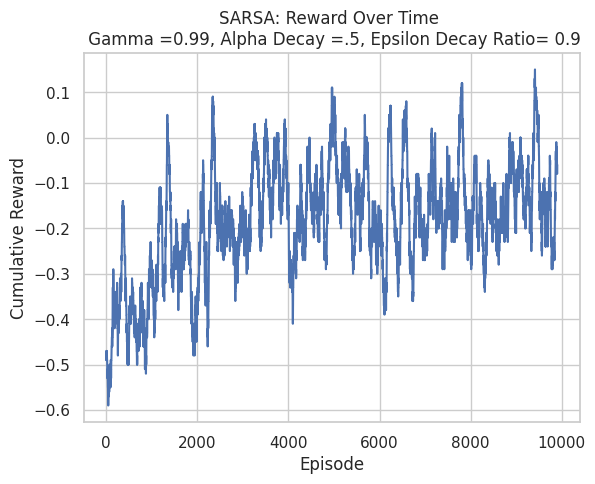

In [ ]:
plt.figure()
plt.plot(moving_average(rewards_bj_sarsa_g_99), label='Smoothed Rewards')
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("SARSA: Reward Over Time \n Gamma =0.99, Alpha Decay =.5, Epsilon Decay Ratio= 0.9")
plt.grid(True)
# plt.legend()
plt.show()

In [ ]:
q_deltas_default = max_q_value_change(Q_track_bj_sarsa_g_99)

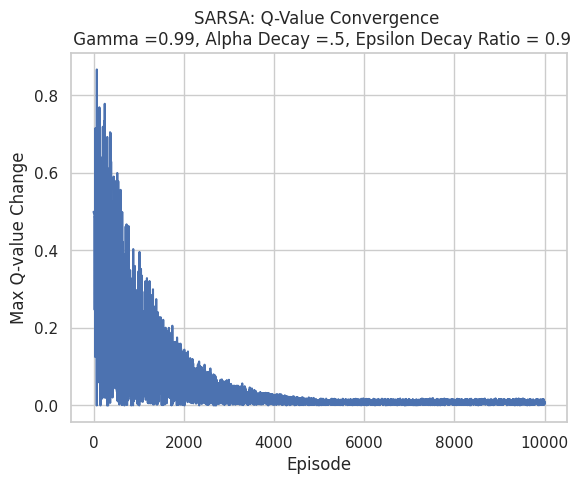

In [ ]:
plt.figure()
plt.plot(q_deltas_default)
plt.xlabel("Episode")
plt.ylabel("Max Q-value Change")
plt.title("SARSA: Q-Value Convergence \n Gamma =0.99, Alpha Decay =.5, Epsilon Decay Ratio = 0.9")
plt.grid(True)
plt.show()

In [ ]:
start_time_sarsa_g75_settings = time.time()
Q_bj_sarsa_g_75, V_bj_sarsa_g_75, pi_bj_sarsa_g_75, Q_track_bj_sarsa_g_75, pi_track_bj_sarsa_g_75, rewards_bj_sarsa_g_75 \
= RL(blackjack).sarsa( nS=None, \
	nA=None,
	gamma=0.75,
	init_alpha=0.5,
	min_alpha=0.01,
	alpha_decay_ratio=0.5,
	init_epsilon=1.0,
	min_epsilon=0.1,
	epsilon_decay_ratio=0.5,
	n_episodes=10000
)

end_time_sarsa_g75_settings = time.time()

time_to_run_g_75_sarsa = (end_time_sarsa_g75_settings - start_time_sarsa_g75_settings)/60 ## in minut

  0%|          | 0/10000 [00:00<?, ?it/s]

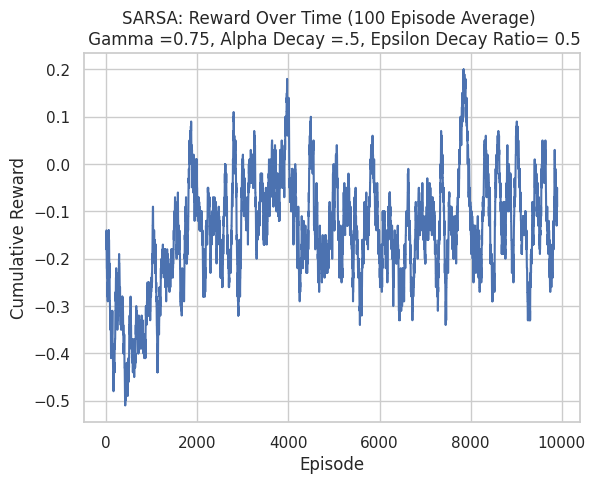

In [ ]:
title = "SARSA Blackjack: Reward Over Time (100 Episode Average) \n Gamma =0.75, Alpha Decay =.5, Epsilon Decay Ratio= 0.5"

title_to_filename(title)
plt.figure()
plt.plot(moving_average(rewards_bj_sarsa_g_75), label='Smoothed Rewards')
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("SARSA: Reward Over Time (100 Episode Average) \n Gamma =0.75, Alpha Decay =.5, Epsilon Decay Ratio= 0.5")
plt.grid(True)
plt.savefig(title_to_filename(title))
# plt.legend()
plt.show()

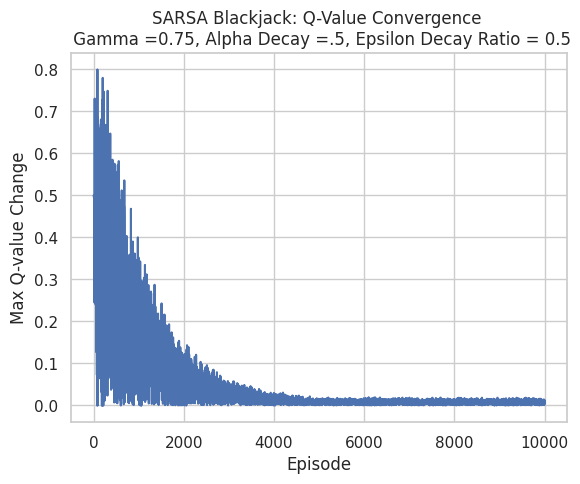

In [ ]:
q_deltas_sarsa_g75 = max_q_value_change(Q_track_bj_sarsa_g_75)
title = "SARSA Blackjack: Q-Value Convergence \n Gamma =0.75, Alpha Decay =.5, Epsilon Decay Ratio = 0.5"
plt.figure()
plt.plot(q_deltas_sarsa_g75)
plt.xlabel("Episode")
plt.ylabel("Max Q-value Change")
plt.title(title)
plt.savefig(title_to_filename(title))

plt.grid(True)
plt.show()

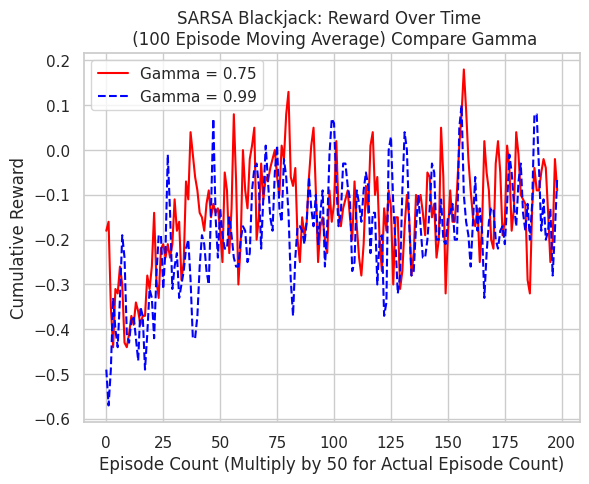

In [ ]:
step = 50  # Plot every 50th point

plt.figure()
title = "SARSA Blackjack: Reward Over Time \n (100 Episode Moving Average) Compare Gamma"
plt.plot(moving_average(rewards_bj_sarsa_g_75)[::step], label = 'Gamma = 0.75', linestyle='-', color='red')
plt.plot(moving_average(rewards_bj_sarsa_g_99)[::step], label = 'Gamma = 0.99', linestyle='--', color='blue')
plt.legend()
plt.xlabel("Episode Count (Multiply by 50 for Actual Episode Count)")
plt.ylabel("Cumulative Reward")
plt.title(title)
plt.grid(True)
plt.savefig(title_to_filename(title))
plt.show()


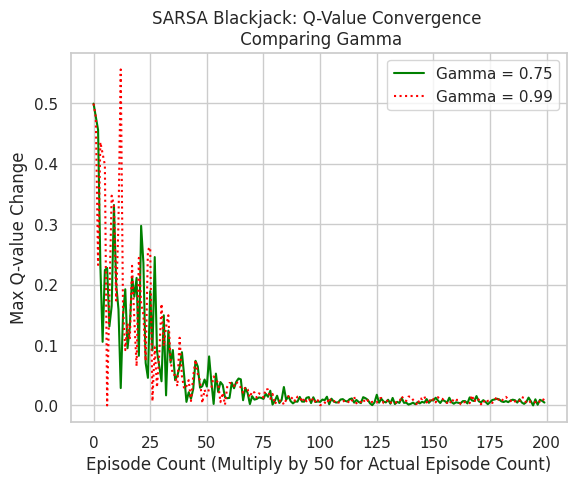

In [ ]:
step = 50  # Plot every 50th point

plt.figure()
title = "SARSA Blackjack: Q-Value Convergence \n Comparing Gamma"
plt.plot(q_deltas_sarsa_g75[::step], label = 'Gamma = 0.75', linestyle='-', color='green')
plt.plot(q_deltas_default[::step], label = 'Gamma = 0.99', linestyle=':', color='red')
plt.legend()
plt.xlabel("Episode Count (Multiply by 50 for Actual Episode Count)")
plt.ylabel("Max Q-value Change")
plt.title(title)
plt.grid(True)
plt.savefig(title_to_filename(title))
plt.show()


### Policy Map for SARSA

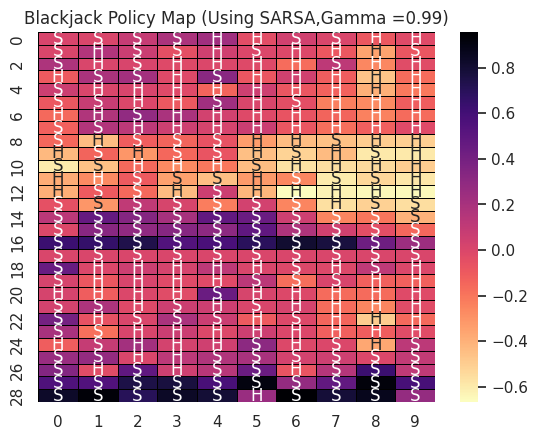

In [ ]:
sarsa_val_max, sarsa_policy_map = Plots.get_policy_map(pi_bj_sarsa_g_99, V_bj_sarsa_g_99, blackjack_actions, blackjack_map_size)

# val_max, policy_map = Plots.get_policy_map(pi_1, V_1, blackjack_actions, blackjack_map_size)
# Q_bj_sarsa_g_99, V_bj_sarsa_g_99, pi_bj_sarsa_g_99, Q_track_bj_sarsa_g_99, pi_track_bj_sarsa_g_99, rewards_bj_sarsa_g_99

title = "Blackjack Policy Map (Using SARSA,Gamma =0.99)"
Plots.modified_plot_policy(sarsa_val_max, sarsa_policy_map, blackjack_map_size, title)

# Cartpole


## Testing Bin sizes of 10


In [ ]:
cart_env = gym.make('CartPole-v1', render_mode=None)

In [ ]:
cartpole_10bins = CartpoleWrapper(cart_env, position_bins=10,
	velocity_bins=10,
	angular_velocity_bins=10,
	angular_center_resolution=0.1,
	angular_outer_resolution=0.5)


In [ ]:
gamma=[.25, .5, 0.75, .9, 1]
n_iters=[100,500,1000, 5000,10000]
theta=[0.0001, .00001,0.000001]

vi_rewards_and_params_results, vi_highest_avg_reward, vi_best_params = GridSearch.vi_grid_search(cartpole_10bins, gamma, n_iters, theta)

running VI with gamma: 0.25  n_iters: 100  theta: 0.0001
Avg. episode reward:  9.35
###################
running VI with gamma: 0.25  n_iters: 100  theta: 1e-05
Avg. episode reward:  9.35
###################
running VI with gamma: 0.25  n_iters: 100  theta: 1e-06
Avg. episode reward:  9.29
###################
running VI with gamma: 0.25  n_iters: 500  theta: 0.0001
Avg. episode reward:  9.44
###################
running VI with gamma: 0.25  n_iters: 500  theta: 1e-05
Avg. episode reward:  9.39
###################
running VI with gamma: 0.25  n_iters: 500  theta: 1e-06
Avg. episode reward:  9.44
###################
running VI with gamma: 0.25  n_iters: 1000  theta: 0.0001
Avg. episode reward:  9.36
###################
running VI with gamma: 0.25  n_iters: 1000  theta: 1e-05
Avg. episode reward:  9.31
###################
running VI with gamma: 0.25  n_iters: 1000  theta: 1e-06
Avg. episode reward:  9.42
###################
running VI with gamma: 0.25  n_iters: 5000  theta: 0.0001
Avg. epis

KeyboardInterrupt: 

In [ ]:
print(vi_best_params)
print(vi_highest_avg_reward)

In [ ]:
V_10bin, V_track_10bin, pi_10bin = Planner(cartpole_10bins.P).value_iteration(gamma=vi_best_params[0],
                                                                              n_iters=vi_best_params[1],
                                                                              theta=vi_best_params[2]) ##using best parameters from grid search



In [ ]:
print(V_10bin)

In [ ]:
max_value_per_iter_10bin_vi = np.trim_zeros(np.mean(V_track_10bin, axis=1), 'b')
Plots.v_iters_plot(max_value_per_iter_10bin_vi, "Cartpole 10 Bins \n Mean Value vs Iterations (Using Value Iteration)")

## Policy Iteration on Bin Size 10

Testing out a random policy iteration before using a grid search


In [ ]:
policy_V_10bin, policy_V_track_10bin, policy_pi_10bin = Planner(cartpole_10bins.P).policy_iteration(gamma=0.5,
                                                                              n_iters=1000,
                                                                              theta=1e-6)



In [ ]:
cartpole_pi_max_value_per_iter = np.trim_zeros(np.mean(policy_V_track_10bin, axis=1), 'b')
Plots.v_iters_plot(cartpole_pi_max_value_per_iter, "Cartpole 10 Bins \n Mean Value vs Iterations (Using Policy Iteration)")

In [ ]:
# gamma=[.25, .5, 0.75, 1]
# n_iters=[100,500, 1000, 5000]
# theta=[.00001,0.000001]

# bin10_pi_rewards_and_params_results, bin10_pi_highest_avg_reward, bin10_pi_best_params = GridSearch.pi_grid_search(cartpole_10bins, gamma, n_iters, theta)

In [ ]:
# print(bin10_pi_best_params)

In [ ]:
# policy_V_10bin, policy_V_track_10bin, policy_pi_10bin = Planner(cartpole_10bins.P).policy_iteration(gamma=bin10_pi_best_params[0],
#                                                                               n_iters=bin10_pi_best_params[1],
#                                                                               theta=bin10_pi_best_params[2]) ##using best parameters from grid search

# cartpole_pi_max_value_per_iter = np.trim_zeros(np.mean(policy_V_track_10bin, axis=1), 'b')
# Plots.v_iters_plot(cartpole_pi_max_value_per_iter, "Cartpole\nMean Value vs Iterations (Using Policy Iteration)")

Comparing the Convergence Time of Different Gammas on 100 Iterations

In [ ]:
policy_V_10bin_gamma_25, policy_V_track_10bin_gamma_25, \
policy_pi_10bin_gamma_25 = Planner(cartpole_10bins.P).policy_iteration(gamma=0.25,
                                                                              n_iters=500,
                                                                              theta=1e-5)

policy_V_track_10bin_gamma_25_df = pd.DataFrame(np.trim_zeros(np.mean(policy_V_track_10bin_gamma_25, axis=1), 'b'))



In [ ]:
policy_V_10bin_gamma_50, policy_V_track_10bin_gamma_50, \
policy_pi_10bin_gamma_50 = Planner(cartpole_10bins.P).policy_iteration(gamma=0.50,
                                                                              n_iters=500,
                                                                              theta=1e-5)

policy_V_track_10bin_gamma_50_df = pd.DataFrame(np.trim_zeros(np.mean(policy_V_track_10bin_gamma_50, axis=1), 'b'))

In [ ]:
policy_V_track_10bin_gamma_50.shape

In [ ]:
policy_V_10bin_gamma_100, policy_V_track_10bin_gamma_100, \
policy_pi_10bin_gamma_100 = Planner(cartpole_10bins.P).policy_iteration(gamma=0.9,
                                                                              n_iters=500,
                                                                              theta=1e-5)

policy_V_track_10bin_gamma_100_df = pd.DataFrame(np.trim_zeros(np.mean(policy_V_track_10bin_gamma_100, axis=1), 'b'))

In [ ]:
###Create plot to copare difference in Gamma divergence
plt.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")
plt.plot(policy_V_track_10bin_gamma_25_df, label = 'Gamma = 0.25')
plt.plot(policy_V_track_10bin_gamma_50_df, label = 'Gamma = 0.50')
plt.plot(policy_V_track_10bin_gamma_100_df, label = 'Gamma = 0.90')
plt.xlabel('Iterations')
plt.ylabel('Mean Value')
plt.title("Cartpole (10 Bins) \n Mean Value vs Iterations (Using PI)")
plt.legend()

plt.show()


## Value Iteration on Bin Size 10

In [ ]:
vi_V_10bin_gamma_25, vi_V_track_10bin_gamma_25, \
vi_pi_10bin_gamma_25 = Planner(cartpole_10bins.P).value_iteration(gamma=0.25,
                                                                              n_iters=500,
                                                                              theta=1e-5)

vi_V_10bin_gamma_25_df = pd.DataFrame(np.trim_zeros(np.mean(vi_V_track_10bin_gamma_25, axis=1), 'b'))


In [ ]:
print(vi_V_track_10bin_gamma_25)

In [ ]:
vi_V_10bin_gamma_25_df.describe()

In [ ]:
vi_V_10bin_gamma_50, vi_V_track_10bin_gamma_50, \
vi_pi_10bin_gamma_50 = Planner(cartpole_10bins.P).value_iteration(gamma=0.50,
                                                                              n_iters=500,
                                                                              theta=1e-5)

vi_V_10bin_gamma_50_df = pd.DataFrame(np.trim_zeros(np.mean(vi_V_track_10bin_gamma_50, axis=1), 'b'))


In [ ]:
vi_V_10bin_gamma_90, vi_V_track_10bin_gamma_90, \
vi_pi_10bin_gamma_90 = Planner(cartpole_10bins.P).value_iteration(gamma=0.90,
                                                                              n_iters=500,
                                                                              theta=1e-5)

vi_V_10bin_gamma_90_df = pd.DataFrame(np.trim_zeros(np.mean(vi_V_track_10bin_gamma_90, axis=1), 'b'))


In [ ]:
vi_V_10bin_gamma_90_df.head(150)

In [ ]:
###Create plot to copare difference in Gamma divergence
plt.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")
plt.plot(vi_V_10bin_gamma_25_df,  label = 'Gamma = 0.25')
plt.plot(vi_V_10bin_gamma_50_df,  label = 'Gamma = 0.50')
plt.plot(vi_V_10bin_gamma_90_df,  label = 'Gamma = 0.90')
plt.xlabel('Iterations')
plt.ylabel('Difference in Mean Value')
plt.title("Cartpole (10 Bins) \n  Mean Value vs Iterations (Using VI)")
plt.legend()
plt.xlim(0, 150)

plt.show()


In [ ]:
plt.plot([np.linalg.norm(vt - vi_V_track_10bin_gamma_90[-1]) for vt in vi_V_track_10bin_gamma_90])
plt.title("Value Function Convergence")
plt.xlabel("Iteration")
plt.ylabel("L2 Distance from Final V")
plt.show()


In [ ]:
vi_V_track_10bin_gamma_90.shape

In [ ]:
# Compute the mean of each row (i.e., mean per iteration)
row_means = np.mean(vi_V_track_10bin_gamma_90, axis=1)  # shape: (500,)

mean_diffs = np.diff(row_means)  # shape: (499,)

mean_diffs_abs = np.abs(mean_diffs)

In [ ]:
# plt.plot(np.trim_zeros(mean_diffs_abs,'b'))
plt.plot(mean_diffs_abs)

plt.title("Change in Average V Across Iterations \n 10 Bin Cartpole, Gamma = 0.9")
plt.xlabel("Iteration")
plt.ylabel("Delta V")
plt.xlim(0, 120)
plt.show()

In [ ]:
# plt.plot((vi_V_track_10bin_gamma_90[vt] - vi_V_track_10bin_gamma_90[vt-1]) for vt in vi_V_track_10bin_gamma_90)
# plt.title("Value Function Convergence")
# plt.xlabel("Iteration")
# plt.ylabel("Delta V")
# plt.show()


## Q Learning on Cartpole

In [ ]:
# test_gamma = [0.25, 0.5, 0.75, 0.99]
# test_epsilon_decay = [0.25, 0.5,0.9]
# test_iters = [10000, 15000]
# q_cartpole_rewards_and_params_results, q_cartpole_highest_avg_reward, q_cartpole_best_params = GridSearch.q_learning_grid_search(cartpole_10bins, test_gamma, test_epsilon_decay, test_iters)


In [ ]:
# print(q_cartpole_best_params)
# print(q_cartpole_highest_avg_reward)

In [ ]:
start_time_gamma99 = time.time()
Q_cartpole_gamma_99, V_cartpole_gamma_99, pi_cartpole_gamma_99, Q_track_cartpole_gamma_99, pi_track_cartpole_gamma_99, rewards_cartpole_gamma_99_q_learning \
 = RL(cartpole_10bins).q_learning( nS=None, \
        nA=None,
        gamma=0.99,
        init_alpha=0.5,
        min_alpha=0.01,
        alpha_decay_ratio=0.5,
        init_epsilon=1.0,
        min_epsilon=0.1,
        epsilon_decay_ratio=0.9,
        n_episodes=20000)

end_time_gamma99 = time.time()

time_to_run_gamma99_qlearning = (end_time_gamma99 - start_time_gamma99)/60 ## in minutes

In [ ]:
# Plotting
plt.figure()
title= "Q-Learning: Cartpole 10 Bins Reward Over Time \n Gamma =0.99, Alpha Decay =.5, Epsilon Decay Ratio= 0.9"
plt.plot(moving_average(rewards_cartpole_gamma_99_q_learning), label='Smoothed Rewards')
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title(title)
plt.grid(True)
plt.savefig(title_to_filename(title))
plt.show()

In [ ]:
# Calculate Q-value deltas
title = "Q-Learning: Cartpole 10 Bin Q-Value Convergence \n Gamma =0.99, Alpha Decay =.5, Epsilon Decay Ratio = 0.9"
q_deltas_cartpole_gamma_99 = max_q_value_change(Q_track_cartpole_gamma_99)

plt.figure()
plt.plot(q_deltas_cartpole_gamma_99)
plt.xlabel("Episode")
plt.ylabel("Max Q-value Change")
plt.title(title)

plt.grid(True)
plt.savefig(title_to_filename(title))
plt.show()

### Gamma of 0.75, Alpha decay 0.5, and Decay Ratio of 0.9



In [ ]:
start_time_gamma75_cp = time.time()
Q_cartpole_gamma_75_q_learning, V_cartpole_gamma_75_q_learning, pi_cartpole_gamma_75_q_learning, Q_track_cartpole_gamma_75_qlearning, pi_track_cartpole_gamma_75_q_learning, rewards_cartpole_gamma_75_q_learning \
 = RL(cartpole_10bins).q_learning( nS=None, \
        nA=None,
        gamma=0.75,
        init_alpha=0.5,
        min_alpha=0.01,
        alpha_decay_ratio=0.5,
        init_epsilon=1.0,
        min_epsilon=0.1,
        epsilon_decay_ratio=0.9,
        n_episodes=15000)

end_time_gamma75_cp = time.time()

cp_time_to_run_gamma75_qlearning = (end_time_gamma75_cp - start_time_gamma75_cp)/60 ## in minutes

In [ ]:
# Plotting
plt.figure()
title= "Q-Learning: Cartpole 10 Bins Reward Over Time \n Gamma =0.75, Alpha Decay =.5, Epsilon Decay Ratio= 0.9"
plt.plot(moving_average(rewards_cartpole_gamma_75_q_learning), label='Smoothed Rewards')
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title(title)
plt.grid(True)
plt.savefig(title_to_filename(title))
plt.show()

In [ ]:
# Calculate Q-value deltas
title = "Q-Learning: Cartpole 10 Bin Q-Value Convergence \n Gamma =0.75, Alpha Decay =.5, Epsilon Decay Ratio = 0.9"
q_deltas_cartpole_gamma_75_qlearning = max_q_value_change(Q_track_cartpole_gamma_75_qlearning)

plt.figure()
plt.plot(q_deltas_cartpole_gamma_75_qlearning)
plt.xlabel("Episode")
plt.ylabel("Max Q-value Change")
plt.title(title)

plt.grid(True)
plt.savefig(title_to_filename(title))
plt.show()

### Gamma of 0.25, Alpha decay 0.5, and Decay Ratio of 0.9

In [ ]:
start_time_gamma25_cp = time.time()
Q_cartpole_gamma_25_q_learning, V_cartpole_gamma_25_q_learning, pi_cartpole_gamma_25_q_learning, Q_track_cartpole_gamma_25_qlearning, pi_track_cartpole_gamma_25_q_learning, rewards_cartpole_gamma_25_q_learning \
 = RL(cartpole_10bins).q_learning( nS=None, \
        nA=None,
        gamma=0.25,
        init_alpha=0.5,
        min_alpha=0.01,
        alpha_decay_ratio=0.5,
        init_epsilon=1.0,
        min_epsilon=0.1,
        epsilon_decay_ratio=0.9,
        n_episodes=15000)

end_time_gamma25_cp = time.time()

cp_time_to_run_gamma25_qlearning = (end_time_gamma25_cp - start_time_gamma25_cp)/60 ## in minutes

In [ ]:
# Plotting
plt.figure()
title= "Q-Learning: Cartpole 10 Bins Reward Over Time \n Gamma =0.25, Alpha Decay =.5, Epsilon Decay Ratio= 0.9"
plt.plot(moving_average(rewards_cartpole_gamma_25_q_learning), label='Smoothed Rewards')
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title(title)
plt.grid(True)
plt.savefig(title_to_filename(title))
plt.show()

In [ ]:
# Calculate Q-value deltas
title = "Q-Learning: Cartpole 10 Bin Q-Value Convergence \n Gamma =0.25, Alpha Decay =.5, Epsilon Decay Ratio = 0.9"
q_deltas_cartpole_gamma_25_qlearning = max_q_value_change(Q_track_cartpole_gamma_25_qlearning)

plt.figure()
plt.plot(q_deltas_cartpole_gamma_25_qlearning)
plt.xlabel("Episode")
plt.ylabel("Max Q-value Change")
plt.title(title)

plt.grid(True)
plt.savefig(title_to_filename(title))
plt.show()

### Comparing The Effects of Gamma


In [ ]:
step = 50  # Plot every 50th point

plt.figure()
title = "Q-Learning: Q-Value Convergence \n Comparing Gamma"
plt.plot(q_deltas_cartpole_gamma_25_qlearning[::step], label = 'Gamma = 0.25', linestyle='--', color='blue')
plt.plot(q_deltas_cartpole_gamma_75_qlearning[::step], label = 'Gamma = 0.75', linestyle='-', color='green')
plt.plot(q_deltas_cartpole_gamma_99[::step], label = 'Gamma = 0.99', linestyle=':', color='red')
plt.legend()
plt.xlabel("Episode Count (Multiply by 50 for Actual Episode Count)")
plt.ylabel("Max Q-value Change")
plt.title(title)
plt.grid(True)
plt.savefig(title_to_filename(title))
plt.show()


In [ ]:
step = 50  # Plot every 50th point

plt.figure()
title = "Q-Learning: Reward Over Time \n (100 Episode Moving Average) Compare Gamma"
plt.plot(moving_average(rewards_cartpole_gamma_25_q_learning)[::step], label = 'Gamma = 0.25', linestyle='--', color='blue')
plt.plot(moving_average(rewards_cartpole_gamma_75_q_learning)[::step], label = 'Gamma = 0.75', linestyle='-', color='green')
plt.plot(moving_average(rewards_cartpole_gamma_99_q_learning)[::step], label = 'Gamma = 0.99', linestyle=':', color='red')
plt.legend()
plt.xlabel("Episode Count (Multiply by 50 for Actual Episode Count)")
plt.ylabel("Cumulative Reward")
plt.title(title)
plt.grid(True)
plt.savefig(title_to_filename(title))
plt.show()


In [ ]:
step = 100  # Plot every 50th point

plt.figure()
title = "Q-Learning: Reward Over Time \n  Compare Gamma"
plt.plot((rewards_cartpole_gamma_25_q_learning)[::step], label = 'Gamma = 0.25', linestyle='--', color='blue')
plt.plot((rewards_cartpole_gamma_75_q_learning)[::step], label = 'Gamma = 0.75', linestyle='-', color='green')
plt.plot((rewards_cartpole_gamma_99_q_learning)[::step], label = 'Gamma = 0.99', linestyle=':', color='red')
plt.legend()
plt.xlabel("Episode Count (Multiply by 100 for Actual Episode Count)")
plt.ylabel("Cumulative Reward")
plt.title(title)
plt.grid(True)
plt.savefig(title_to_filename(title))
plt.show()


### Compare the Effects of Initial Epsilon

In [ ]:
start_time_gamma99_e_70 = time.time()
Q_cartpole_gamma_99_e_70, V_cartpole_gamma_99_e_70, pi_cartpole_gamma_99_e_70, Q_track_cartpole_gamma_99_e_70, pi_track_cartpole_gamma_99_e_70, rewards_cartpole_gamma_99_q_learning_e_70 \
 = RL(cartpole_10bins).q_learning( nS=None, \
        nA=None,
        gamma=0.99,
        init_alpha=0.5,
        min_alpha=0.01,
        alpha_decay_ratio=0.5,
        init_epsilon=.70,
        min_epsilon=0.1,
        epsilon_decay_ratio=0.9,
        n_episodes=20000)

end_time_gamma99_e_70 = time.time()

time_to_run_gamma99_qlearning_e_70 = (end_time_gamma99_e_70 - start_time_gamma99_e_70)/60 ## in minutes

In [ ]:
step = 50  # Plot every 50th point

plt.figure()
title = "Q-Learning: Q-Value Convergence \n Comparing Gamma"
plt.plot(q_deltas_cartpole_gamma_25_qlearning[::step], label = 'Gamma = 0.25', linestyle='--', color='blue')
plt.plot(q_deltas_cartpole_gamma_75_qlearning[::step], label = 'Gamma = 0.75', linestyle='-', color='green')
plt.plot(q_deltas_cartpole_gamma_99[::step], label = 'Gamma = 0.99', linestyle=':', color='red')
plt.legend()
plt.xlabel("Episode Count (Multiply by 50 for Actual Episode Count)")
plt.ylabel("Max Q-value Change")
plt.title(title)
plt.grid(True)
plt.savefig(title_to_filename(title))
plt.show()


## SARSA on Cartpole

In [ ]:
start_time_sarsa_gamma99 = time.time()
Q_cartpole_gamma_99_sarsa, V_cartpole_gamma_99_sarsa, pi_cartpole_gamma_99_sarsa, Q_track_cartpole_gamma_99_sarsa, pi_track_cartpole_gamma_99_sarsa, rewards_cartpole_gamma_99_sarsa \
 = RL(cartpole_10bins).sarsa( nS=None, \
        nA=None,
        gamma=0.99,
        init_alpha=0.5,
        min_alpha=0.01,
        alpha_decay_ratio=0.5,
        init_epsilon=1.0,
        min_epsilon=0.1,
        epsilon_decay_ratio=0.9,
        n_episodes=20000)

end_time_sarsa_gamma99 = time.time()

time_to_run_gamma99_sarsa = (end_time_sarsa_gamma99 - start_time_sarsa_gamma99)/60 ## in minutes

In [ ]:
# Plotting
plt.figure()
title= "SARSA: Cartpole 10 Bins Reward Over Time (100 Episode MA) \n Gamma =0.99, Alpha Decay =.5, Epsilon Decay Ratio= 0.9"
plt.plot(moving_average(rewards_cartpole_gamma_99_sarsa), label='Smoothed Rewards')
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title(title)
plt.grid(True)
plt.savefig(title_to_filename(title))
plt.show()

In [ ]:
# Calculate Q-value deltas
title = "SARSA: Cartpole 10 Bin Q-Value Convergence \n Gamma =0.99, Alpha Decay =.5, Epsilon Decay Ratio = 0.9"
q_deltas_cartpole_gamma_99_sarsa = max_q_value_change(Q_track_cartpole_gamma_99_sarsa)

plt.figure()
plt.plot(q_deltas_cartpole_gamma_99_sarsa)
plt.xlabel("Episode")
plt.ylabel("Max Q-value Change")
plt.title(title)

plt.grid(True)
plt.savefig(title_to_filename(title))
plt.show()

### Gamma of 0.75


In [ ]:
start_time_sarsa_gamma75 = time.time()
Q_cartpole_gamma_75_sarsa, V_cartpole_gamma_75_sarsa, pi_cartpole_gamma_75_sarsa, Q_track_cartpole_gamma_75_sarsa, pi_track_cartpole_gamma_75_sarsa, rewards_cartpole_gamma_75_sarsa \
 = RL(cartpole_10bins).sarsa( nS=None, \
        nA=None,
        gamma=0.75,
        init_alpha=0.5,
        min_alpha=0.01,
        alpha_decay_ratio=0.5,
        init_epsilon=1.0,
        min_epsilon=0.1,
        epsilon_decay_ratio=0.9,
        n_episodes=20000)

end_time_sarsa_gamma75 = time.time()

time_to_run_gamma75_sarsa = (end_time_sarsa_gamma75 - start_time_sarsa_gamma75)/60 ## in minutes

In [ ]:
q_deltas_cartpole_gamma_75_sarsa = max_q_value_change(Q_track_cartpole_gamma_75_sarsa)

### Gamma of 0.25


In [ ]:
start_time_sarsa_gamma25 = time.time()
Q_cartpole_gamma_25_sarsa, V_cartpole_gamma_25_sarsa, pi_cartpole_gamma_25_sarsa, Q_track_cartpole_gamma_25_sarsa, pi_track_cartpole_gamma_25_sarsa, rewards_cartpole_gamma_25_sarsa \
 = RL(cartpole_10bins).sarsa( nS=None, \
        nA=None,
        gamma=0.25,
        init_alpha=0.5,
        min_alpha=0.01,
        alpha_decay_ratio=0.5,
        init_epsilon=1.0,
        min_epsilon=0.1,
        epsilon_decay_ratio=0.9,
        n_episodes=20000)

end_time_sarsa_gamma25 = time.time()

time_to_run_gamma25_sarsa = (end_time_sarsa_gamma25 - start_time_sarsa_gamma25)/60 ## in minutes

In [ ]:
q_deltas_cartpole_gamma_25_sarsa = max_q_value_change(Q_track_cartpole_gamma_25_sarsa)

### Comparing the Effects of Gamma

In [ ]:
step = 50  # Plot every 50th point

plt.figure()
title = "SARSA: Cartpole 10 Bins Q-Value Convergence \n Comparing the Effects of Gamma"
plt.plot(q_deltas_cartpole_gamma_25_sarsa[::step], label = 'Gamma = 0.25', linestyle='--', color='blue')
plt.plot(q_deltas_cartpole_gamma_75_sarsa[::step], label = 'Gamma = 0.75', linestyle='-', color='green')
plt.plot(q_deltas_cartpole_gamma_99_sarsa[::step], label = 'Gamma = 0.99', linestyle=':', color='orange')
plt.legend()
plt.xlabel("Episode Count (Multiply by 50 for Actual Episode Count)")
plt.ylabel("Max Q-value Change")
plt.title(title)
plt.grid(True)
plt.savefig(title_to_filename(title))
plt.show()


In [ ]:
step = 50  # Plot every 50th point

plt.figure()
title = "SARSA: Cartpole 10 Bins Reward Over Time \n (100 Episode Moving Average) Compare Effects of Gamma"
plt.plot(moving_average(rewards_cartpole_gamma_25_sarsa)[::step], label = 'Gamma = 0.25', linestyle='--', color='blue')
plt.plot(moving_average(rewards_cartpole_gamma_75_sarsa)[::step], label = 'Gamma = 0.75', linestyle='-', color='green')
plt.plot(moving_average(rewards_cartpole_gamma_99_sarsa)[::step], label = 'Gamma = 0.99', linestyle=':', color='red')
plt.legend()
plt.xlabel("Episode Count (Multiply by 50 for Actual Episode Count)")
plt.ylabel("Cumulative Reward")
plt.title(title)
plt.grid(True)
plt.savefig(title_to_filename(title))
plt.show()


In [ ]:
step = 50  # Plot every 50th point

plt.figure()
title = "SARSA: Cartpole 10 Bins Reward Over Time \n Compare Effects of Gamma"
plt.plot((rewards_cartpole_gamma_25_sarsa)[::step], label = 'Gamma = 0.25', linestyle='--', color='blue')
plt.plot((rewards_cartpole_gamma_75_sarsa)[::step], label = 'Gamma = 0.75', linestyle='-', color='green')
plt.plot((rewards_cartpole_gamma_99_sarsa)[::step], label = 'Gamma = 0.99', linestyle=':', color='orange')
plt.legend()
plt.xlabel("Episode Count (Multiply by 50 for Actual Episode Count)")
plt.ylabel("Cumulative Reward")
plt.title(title)
plt.grid(True)
plt.savefig(title_to_filename(title))
plt.show()


## Comparing SARSA to Q Learning for Cartpole


In [ ]:
plt.figure(figsize=(10, 5))
title = "CartPole 10 Bins Reward Over Time: SARSA vs Q-Learning (100 Episode MA)"
plt.plot(moving_average(rewards_cartpole_gamma_99_q_learning), label='Q-Learning', alpha=0.8)
plt.plot(moving_average(rewards_cartpole_gamma_99_sarsa), label='SARSA', alpha=0.8)
plt.xlabel("Episode")
plt.ylabel("Average Episode Length")
plt.title(title)
plt.grid(True)
plt.legend()
plt.savefig(title_to_filename(title))
plt.show()


In [ ]:
plt.figure(figsize=(10, 5))
step = 50
title = "CartPole 10 Bins Reward Over Time: SARSA vs Q-Learning"
plt.plot((rewards_cartpole_gamma_99_q_learning)[::step], label='Q-Learning', alpha=0.8)
plt.plot((rewards_cartpole_gamma_99_sarsa)[::step], label='SARSA', alpha=0.8)
plt.xlabel("Episode")
plt.ylabel("Average Episode Length")
plt.title(title)
plt.grid(True)
plt.legend()
plt.savefig(title_to_filename(title))
plt.show()


In [ ]:
plt.figure(figsize=(10, 5))

title = "CartPole 10 Bin Q-Value Convergence: SARSA vs Q-Learning"
plt.plot(q_deltas_cartpole_gamma_99, label='Q-Learning', alpha=0.8)
plt.plot(q_deltas_cartpole_gamma_99_sarsa, label='SARSA', alpha=0.8)
plt.xlabel("Episode")
plt.ylabel("Max ΔQ(s,a)")
plt.title(title)
plt.grid(True)
plt.legend()
plt.savefig(title_to_filename(title))

plt.show()

In [ ]:
plt.figure(figsize=(10, 5))

title = "CartPole 10 Bin Episode Length Distribution: SARSA vs Q-Learning"

plt.hist(rewards_cartpole_gamma_99_q_learning, bins=20, alpha=0.6, label='Q-Learning', edgecolor='black')
plt.hist(rewards_cartpole_gamma_99_sarsa, bins=20, alpha=0.6, label='SARSA', edgecolor='black')
plt.xlabel("Episode Length")
plt.ylabel("Frequency")
plt.title(title)
plt.grid(True)
plt.legend()
plt.savefig(title_to_filename(title))
plt.show()
